In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and inspect data
df = pd.read_csv(r'C:\Users\Lenovo\Documents\music.csv')
df.head(3)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop


In [5]:
# check for missing values
print(df.isnull().sum())

age       0
gender    0
genre     0
dtype: int64


In [6]:
# Get the statistics summary
print(df.describe())

             age     gender
count  18.000000  18.000000
mean   27.944444   0.500000
std     5.127460   0.514496
min    20.000000   0.000000
25%    25.000000   0.000000
50%    28.000000   0.500000
75%    31.000000   1.000000
max    37.000000   1.000000


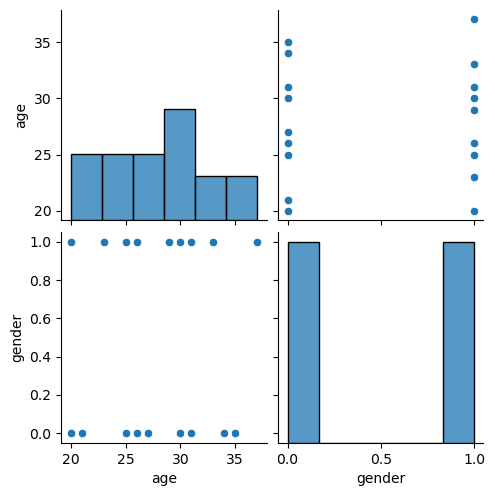

In [7]:
# explore the data
sns.pairplot(df)
plt.show()

In [8]:
# Group by gender
gender_stats = df.groupby('gender')['genre'].describe()
print(gender_stats)


       count unique     top freq
gender                          
0          9      3   Dance    3
1          9      3  HipHop    3


In [9]:
# Group by genre
genre_stats = df.groupby('genre')['gender'].describe()
print(genre_stats)

           count  mean       std  min  25%  50%  75%  max
genre                                                    
Acoustic     3.0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0
Classical    6.0   0.5  0.547723  0.0  0.0  0.5  1.0  1.0
Dance        3.0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0
HipHop       3.0   1.0  0.000000  1.0  1.0  1.0  1.0  1.0
Jazz         3.0   1.0  0.000000  1.0  1.0  1.0  1.0  1.0


In [10]:
# Convert categorical columns to numerical representation
genre_map = {'HipHop': 0, 'Jazz': 1, 'Classical': 2, 'Dance': 3, 'Acoustic': 4 }
df['genre'] = df['genre'].map(genre_map)

In [21]:
# Split data into features (X) and labels (y)
X = df[['age', 'gender']]
y = df['genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Create and train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# Make predictions on testing data
y_pred = model.predict(X_test)

In [15]:
# Evaluate model accuracy

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion_matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion_matrix:
[[2 0 0]
 [0 1 0]
 [0 0 1]]


In [16]:
def recommend_music(age, gender, num_recommendations):
    # Convert input to numerical
    gender = 0 if gender == 'Male' else 1
    
    # Make prediction
    prediction = model.predict([[age, gender]])

    # Get recommended genre
    genres = ['Hiphop', 'Jazz', 'Classical','Dance', 'Acoustic', ]
    genre = genres[prediction[0]]
    
    # Return recommended music
    return genre


In [18]:
# Test recommendation function
recommended_genre = recommend_music(25, 'Male', 5)
print(f"\nRecommended Genre: {recommended_genre}")


Recommended Genre: Classical
